# 1. BUSINESS UNDERSTANDING

Rambut rontok adalah permasalahan utama yang terjadi pada rambut. Rambut rontok menjadi
salah satu permasalahan rambut yang sering ditemui.Kerontokan rambut dapat memengaruhi fungsi biologis rambut
terhadap tubuh, apabila melebihi batas normal. Selain itu, kerontokan rambut yang dapat
mengakibatkan kebotakan dan memengaruhi kepercayaan diri seseorang sehingga menjadi
masalah yang sangat mengkhawatirkan. Oleh karena itu, prediksi kerontokan rambut
diperlukan untuk menentukan tindakan yang tepat dalam mengatasi masalah tersebut.

# 2. DATA UNDERSTANDING

In [217]:
# Standard library
import warnings

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    roc_auc_score,
    precision_recall_curve,
)
from sklearn.utils import resample

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Ignore warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [218]:
hair = pd.read_excel("hair.xlsx", sheet_name="hairfall_problem3592")

In [219]:
hair.head()

,Timestamp,What is your name ?,What is your age ?,What is your gender ?,Do you have hair fall problem ?,Is there anyone in your family having a hair fall problem or a baldness issue?,Did you face any type of chronic illness in the past?,Do you stay up late at night?,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,"Do you use chemicals, hair gel, or color in your hair?",Do you have anemia?,Do you have too much stress,What is your food habit
0,2023-05-22 10:35:54,Mahfuj Sikder Arnob,22,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Both
1,2023-05-23 10:34:34,Tonmoy,18,Male,No,No,No,No,No,Yes,Yes,No,No,Both
2,2023-05-23 10:35:38,Sayeed Dewan,25,Male,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Both
3,2023-05-23 10:37:05,Abdullah,17,Male,No,No,No,Yes,No,Yes,No,Yes,Yes,Both
4,2023-05-24 10:23:09,Jamal Hasan,28,Male,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious


In [220]:
hair.tail()

,Timestamp,What is your name ?,What is your age ?,What is your gender ?,Do you have hair fall problem ?,Is there anyone in your family having a hair fall problem or a baldness issue?,Did you face any type of chronic illness in the past?,Do you stay up late at night?,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,"Do you use chemicals, hair gel, or color in your hair?",Do you have anemia?,Do you have too much stress,What is your food habit
711,2024-01-02 21:30:25,Arpita khatun,28,Female,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Both
712,2024-01-02 21:31:07,Galib Hasan,27,Male,Yes,No,No,Yes,Yes,Yes,No,No,Yes,Both
713,2024-01-02 21:31:57,Ishtiaque,16,Male,No,No,No,No,No,No,Yes,No,No,Both
714,2024-01-02 21:32:36,Subrato Barmon,30,Male,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Both
715,2024-01-02 21:37:18,Kumar Mondal,30,Male,Yes,Yes,No,No,No,Yes,Yes,No,Yes,Both


In [221]:
#INFORMASI TENTANG UKURAN DIMENSI DATA
hair.shape

(716, 14)

In [222]:
#Struktur data dari data set
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 14 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Timestamp                                                                       716 non-null    datetime64[ns]
 1   What is your name ?                                                             716 non-null    object        
 2   What is your age ?                                                              716 non-null    int64         
 3   What is your gender ?                                                           716 non-null    object        
 4   Do you have hair fall problem ?                                                 716 non-null    object        
 5   Is there anyone in your family having a hair fall problem or a baldness issue?

In [223]:
#Memeriksa adakah data yang kosong(null)?
hair.isnull().sum(axis=0)

,0
Timestamp,0
What is your name ?,0
What is your age ?,0
What is your gender ?,0
Do you have hair fall problem ?,0
Is there anyone in your family having a hair fall problem or a baldness issue?,0
Did you face any type of chronic illness in the past?,0
Do you stay up late at night?,0
Do you have any type of sleep disturbance?,0
Do you think that in your area water is a reason behind hair fall problems?,0


In [224]:
#Melihat statistik deskriptif dari data
hair.describe()

,Timestamp,What is your age ?
count,716,716.000000
mean,2023-08-27 08:51:42.469273600,24.121508
min,2023-05-22 10:35:54,15.000000
25%,2023-08-06 01:54:32.249999872,21.000000
50%,2023-09-19 12:03:43.500000,24.000000
75%,2023-09-19 13:53:18.500000,27.000000
max,2024-01-02 21:37:18,218.000000
std,NaN,8.446825


In [225]:
#Melakukan Do you have hair fall problem ?analisa berapa jumalah yang mengalami rambut rontok?
hair['Do you have hair fall problem ?'].value_counts()

,count
Do you have hair fall problem ?,
Yes,482
No,234


In [226]:
hair.duplicated().sum()

np.int64(0)

# 3. DATA PREPARATION

In [227]:
# Mengubah nama kolom ke dalam bahasa Indonesia
hair.rename(columns={
    "What is your name ?": "Nama",
    "What is your age ?": "Usia",
    "What is your gender ?": "Jenis_Kelamin",
    "Do you have hair fall problem ?": "Rambut_Rontok",
    "Is there anyone in your family having a hair fall problem or a baldness issue?": "Genetik",
    "Did you face any type of chronic illness in the past?": "Penyakit_Kronis",
    "Do you stay up late at night?": "Sering_Begadang",
    "Do you have any type of sleep disturbance?": "Gangguan_Tidur",
    "Do you think that in your area water is a reason behind hair fall problems?": "Masalah_Air",
    "Do you use chemicals, hair gel, or color in your hair?": "Penggunaan_Produk_Rambut",
    "Do you have anemia?": "Anemia",
    "Do you have too much stress": "Stres",
    "What is your food habit": "Kebiasaan_Makan"
}, inplace=True)

# Menampilkan nama kolom setelah perubahan
hair.head()

,Timestamp,Nama,Usia,Jenis_Kelamin,Rambut_Rontok,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan
0,2023-05-22 10:35:54,Mahfuj Sikder Arnob,22,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Both
1,2023-05-23 10:34:34,Tonmoy,18,Male,No,No,No,No,No,Yes,Yes,No,No,Both
2,2023-05-23 10:35:38,Sayeed Dewan,25,Male,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Both
3,2023-05-23 10:37:05,Abdullah,17,Male,No,No,No,Yes,No,Yes,No,Yes,Yes,Both
4,2023-05-24 10:23:09,Jamal Hasan,28,Male,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious


In [228]:
hair = hair.drop(['Timestamp','Nama'], axis=1)
hair.head()

,Usia,Jenis_Kelamin,Rambut_Rontok,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan
0,22,Male,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,Both
1,18,Male,No,No,No,No,No,Yes,Yes,No,No,Both
2,25,Male,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Both
3,17,Male,No,No,No,Yes,No,Yes,No,Yes,Yes,Both
4,28,Male,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious


# NORMALISASI

In [229]:
#MEMINDAHKAN KOLOM Rambut_Rontok

# Dapatkan semua nama kolom
columns = list(hair.columns)

# Hapus 'Rambut_Rontok' dari daftar kolom
columns.remove('Rambut_Rontok')

# Tambahkan 'Rambut_Rontok' ke akhir daftar
columns.append('Rambut_Rontok')

# Susun ulang DataFrame berdasarkan urutan kolom baru
hair = hair[columns]

In [230]:
hair.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,22,Male,Yes,Yes,Yes,No,No,No,Yes,Yes,Both,Yes
1,18,Male,No,No,No,No,Yes,Yes,No,No,Both,No
2,25,Male,Yes,Yes,No,No,Yes,No,No,Yes,Both,Yes
3,17,Male,No,No,Yes,No,Yes,No,Yes,Yes,Both,No
4,28,Male,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Nutritious,No


In [231]:
# Set seed sekali agar acakan konsisten
np.random.seed(42)

# Daftar pilihan jika 'Yes'
kategori_yes = [
    'Kadang-kadang Begadang',
    'Sering Begadang',
    'Sangat Sering Begadang'
]

# Buat array baru berdasarkan kolom 'Sering_Begadang'
def map_begadang(val):
    if val == 'No':
        return 'Tidak Begadang'
    else:
        return np.random.choice(kategori_yes)

# Terapkan ke kolom
hair['Sering_Begadang'] = hair['Sering_Begadang'].apply(map_begadang)

In [232]:
# Ubah nilai-nilai kolom

hair['Gangguan_Tidur'] = hair['Gangguan_Tidur'].map({
    'Yes': 'Insomnia',
    'No': 'Tidak Ada Gangguan'
})

hair['Masalah_Air'] = hair['Masalah_Air'].map({
    'Yes': 'Air Berkapur',
    'No': 'Air Bersih'
})

hair['Penggunaan_Produk_Rambut'] = hair['Penggunaan_Produk_Rambut'].map({
    'Yes': 'Mengandung Sulfat',
    'No': 'Tidak Pakai Produk'
})

hair['Anemia'] = hair['Anemia'].map({
    'Yes': 'Ada Anemia',
    'No': 'Tidak Ada Anemia'
})

hair['Stres'] = hair['Stres'].map({
   'Yes': 'High',
   'No': 'Low'
})

hair['Kebiasaan_Makan'] = hair['Kebiasaan_Makan'].replace({
    'Both': 'keduanya',
    'Nutritious': 'bernutrisi',
    'Dependent on fast food': 'Ketergantungan Makanan cepat saji'
})

In [233]:
# Fungsi untuk membagi kategori Anemia
# Atur seed untuk hasil acak yang konsisten
np.random.seed(42)

# Fungsi mapping anemia
def kategori_anemia(val):
    if val == 'Tidak Ada Anemia':
        return 'Tidak Ada Anemia'
    elif val == 'Ada Anemia':
        return np.random.choice(['Anemia Ringan', 'Anemia Sedang', 'Anemia Berat'])

# Terapkan ke kolom 'Anemia'
hair['Anemia'] = hair['Anemia'].apply(kategori_anemia)

# Lihat distribusi hasil
print(hair['Anemia'].value_counts())

Anemia
Tidak Ada Anemia    511
Anemia Berat         73
Anemia Ringan        68
Anemia Sedang        64
Name: count, dtype: int64


In [234]:
# Atur seed untuk hasil acak yang konsisten
np.random.seed(42)

# Fungsi mapping stres
def kategori_stres(val):
    if val in ['No', 'Low', 'Rendah']:
        return 'Low'
    elif val in ['Yes', 'High', 'Tinggi']:
        return np.random.choice(['Moderate', 'High'])
    else:
        return 'Low'

# Terapkan fungsi
hair['Stres'] = hair['Stres'].apply(kategori_stres)

# Lihat distribusi hasil
print(hair['Stres'].value_counts())

Stres
High        263
Moderate    252
Low         201
Name: count, dtype: int64


In [235]:
hair.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,22,Male,Yes,Yes,Sangat Sering Begadang,Tidak Ada Gangguan,Air Bersih,Tidak Pakai Produk,Anemia Berat,Moderate,keduanya,Yes
1,18,Male,No,No,Tidak Begadang,Tidak Ada Gangguan,Air Berkapur,Mengandung Sulfat,Tidak Ada Anemia,Low,keduanya,No
2,25,Male,Yes,Yes,Tidak Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Tidak Ada Anemia,High,keduanya,Yes
3,17,Male,No,No,Kadang-kadang Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Anemia Ringan,Moderate,keduanya,No
4,28,Male,Yes,Yes,Sangat Sering Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Anemia Berat,Moderate,bernutrisi,No


In [236]:
hair.to_csv("hair2.csv", index=False)

In [237]:
hair = pd.read_csv("hair2.csv")
hair.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,22,Male,Yes,Yes,Sangat Sering Begadang,Tidak Ada Gangguan,Air Bersih,Tidak Pakai Produk,Anemia Berat,Moderate,keduanya,Yes
1,18,Male,No,No,Tidak Begadang,Tidak Ada Gangguan,Air Berkapur,Mengandung Sulfat,Tidak Ada Anemia,Low,keduanya,No
2,25,Male,Yes,Yes,Tidak Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Tidak Ada Anemia,High,keduanya,Yes
3,17,Male,No,No,Kadang-kadang Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Anemia Ringan,Moderate,keduanya,No
4,28,Male,Yes,Yes,Sangat Sering Begadang,Tidak Ada Gangguan,Air Berkapur,Tidak Pakai Produk,Anemia Berat,Moderate,bernutrisi,No


In [238]:
hair.duplicated().sum()

np.int64(52)

In [239]:
hair = hair.drop_duplicates()

In [240]:
hair.duplicated().sum()

np.int64(0)

In [241]:
# Encoding kategorikal dengan .loc untuk menghindari warning
le = LabelEncoder()
for col in hair.columns:
    if hair[col].dtype == 'object':
        hair.loc[:, col] = le.fit_transform(hair[col])
print("Dataset setelah encoding:\n", hair.head())

Dataset setelah encoding:
    Usia Jenis_Kelamin Genetik Penyakit_Kronis Sering_Begadang Gangguan_Tidur  \
0    22             1       1               1               1              1   
1    18             1       0               0               3              1   
2    25             1       1               1               3              1   
3    17             1       0               0               0              1   
4    28             1       1               1               1              1   

  Masalah_Air Penggunaan_Produk_Rambut Anemia Stres Kebiasaan_Makan  \
0           1                        1      0     2               2   
1           0                        0      3     1               2   
2           0                        1      3     0               2   
3           0                        1      1     2               2   
4           0                        1      0     2               1   

  Rambut_Rontok  
0             1  
1             0  
2          

In [242]:
# Balancing 50:50
hair_major = hair[hair["Rambut_Rontok"] == 0]
hair_minor = hair[hair["Rambut_Rontok"] == 1]
n_samples = min(len(hair_major), len(hair_minor))
hair_balanced = pd.concat([
    resample(hair_major, n_samples=n_samples, random_state=42),
    resample(hair_minor, n_samples=n_samples, random_state=42)
]).sample(frac=1, random_state=42)

In [243]:
hair_balanced.to_csv("hair3.csv", index=False)

In [244]:
hair_balanced = pd.read_csv("hair3.csv")
hair_balanced.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,16,1,1,0,3,1,1,0,3,1,1,0
1,26,0,1,0,0,0,1,0,3,2,0,1
2,19,0,1,0,2,1,0,0,3,2,2,1
3,24,1,1,1,0,0,1,0,2,2,0,0
4,30,1,1,1,2,1,1,0,2,2,2,0


In [245]:
hair_balanced['Rambut_Rontok'].value_counts()

,count
Rambut_Rontok,
0,204
1,204


In [246]:
hair_balanced.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,16,1,1,0,3,1,1,0,3,1,1,0
1,26,0,1,0,0,0,1,0,3,2,0,1
2,19,0,1,0,2,1,0,0,3,2,2,1
3,24,1,1,1,0,0,1,0,2,2,0,0
4,30,1,1,1,2,1,1,0,2,2,2,0


In [247]:
#Pemisahan data dan label
X = hair_balanced.drop (columns='Rambut_Rontok', axis=1)
y = hair_balanced['Rambut_Rontok']

In [248]:
# SMOTE balancing
X_res, y_res = SMOTE(random_state=42).fit_resample(X, y)

In [249]:
y.shape

(408,)

In [250]:
hair_balanced.duplicated().sum()
duplicates_only = hair_balanced[hair_balanced.duplicated(keep='first')]
display(duplicates_only)
print("Jumlah duplikat:", len(duplicates_only))

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
43,16,1,1,0,3,1,1,0,3,1,1,0
53,24,0,0,0,0,0,1,1,2,0,2,0
56,28,1,1,0,3,1,0,1,3,1,2,0
58,26,1,0,0,3,0,1,1,0,1,2,0
63,26,1,0,0,3,1,1,0,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
398,30,0,1,0,1,0,0,0,3,0,2,1
399,27,1,0,0,1,0,0,1,3,2,0,0
401,17,1,0,0,0,1,0,1,1,2,2,0
402,26,1,0,0,3,0,1,1,0,1,2,0


Jumlah duplikat: 121


In [251]:
X.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan
0,16,1,1,0,3,1,1,0,3,1,1
1,26,0,1,0,0,0,1,0,3,2,0
2,19,0,1,0,2,1,0,0,3,2,2
3,24,1,1,1,0,0,1,0,2,2,0
4,30,1,1,1,2,1,1,0,2,2,2


In [252]:
hair_balanced= hair_balanced.drop_duplicates()

In [253]:
hair_balanced.duplicated().sum()

np.int64(0)

In [254]:
hair_balanced.shape

(287, 12)

In [255]:
hair_balanced.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,16,1,1,0,3,1,1,0,3,1,1,0
1,26,0,1,0,0,0,1,0,3,2,0,1
2,19,0,1,0,2,1,0,0,3,2,2,1
3,24,1,1,1,0,0,1,0,2,2,0,0
4,30,1,1,1,2,1,1,0,2,2,2,0


In [256]:
X = hair_balanced.drop(columns='Rambut_Rontok', axis=1)
y = hair_balanced['Rambut_Rontok']
print(X.shape, y.shape)

(287, 11) (287,)


In [257]:
hair_balanced.dtypes

,0
Usia,int64
Jenis_Kelamin,int64
Genetik,int64
Penyakit_Kronis,int64
Sering_Begadang,int64
Gangguan_Tidur,int64
Masalah_Air,int64
Penggunaan_Produk_Rambut,int64
Anemia,int64
Stres,int64


In [258]:
hair_balanced.isnull().sum()

,0
Usia,0
Jenis_Kelamin,0
Genetik,0
Penyakit_Kronis,0
Sering_Begadang,0
Gangguan_Tidur,0
Masalah_Air,0
Penggunaan_Produk_Rambut,0
Anemia,0
Stres,0


In [259]:
hair_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 407
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Usia                      287 non-null    int64
 1   Jenis_Kelamin             287 non-null    int64
 2   Genetik                   287 non-null    int64
 3   Penyakit_Kronis           287 non-null    int64
 4   Sering_Begadang           287 non-null    int64
 5   Gangguan_Tidur            287 non-null    int64
 6   Masalah_Air               287 non-null    int64
 7   Penggunaan_Produk_Rambut  287 non-null    int64
 8   Anemia                    287 non-null    int64
 9   Stres                     287 non-null    int64
 10  Kebiasaan_Makan           287 non-null    int64
 11  Rambut_Rontok             287 non-null    int64
dtypes: int64(12)
memory usage: 29.1 KB


In [260]:
# Load ulang dataset
hair_balanced = pd.read_csv("hair3.csv")

In [261]:
# Standarisasi dataset (agar semua fitur memiliki skala yang sama)
# Standarisasi dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [262]:
scaler.fit(X_res)

StandardScaler()

# 4. MODELLING

In [263]:
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
classifier.fit(X_scaled, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [264]:
# Split data 90:10
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42, stratify=y
)
print(X.shape, X_train.shape, X_test.shape)


(287, 11) (258, 11) (29, 11)


In [265]:
# Parameter grid
param_grid = {
    'max_depth': [7],
    'n_estimators': [300],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}
# GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [300],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [266]:
#EVALUASI

#Akurasi Data Training 90:10
best_model = grid.best_estimator_
X_train_predict = best_model.predict(X_train)
train_acc = accuracy_score(y_train, X_train_predict)
print("Akurasi Data Training =", train_acc)
#Akurasi Data Testing 90:10
X_test_predict = best_model.predict(X_test)
test_acc = accuracy_score(y_test, X_test_predict)
print("Akurasi Data Testing =", test_acc)

#CV Akurasi
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Prediksi pada data test
Y_pred = best_model.predict(X_test)
# Hitung akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Tampilkan hasil
print("Laporan Klasifikasi:")
print(classification_report(y_test, Y_pred))

Akurasi Data Training = 0.9418604651162791
Akurasi Data Testing = 0.9655172413793104
Mean CV Accuracy: 0.771342383107089
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



In [267]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(X.shape, X_train.shape, X_test.shape)

(287, 11) (229, 11) (58, 11)


In [268]:
# Parameter grid
param_grid = {
    'max_depth': [7],
    'n_estimators': [300],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}
# GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [300],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [269]:
best_model = grid.best_estimator_
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [270]:
#EVALUASI

#Akurasi Data Training 80:20
best_model = grid.best_estimator_
X_train_predict = best_model.predict(X_train)
train_acc = accuracy_score(y_train, X_train_predict)
print("Akurasi Data Training =", train_acc)
#Akurasi Data Testing 80:20
X_test_predict = best_model.predict(X_test)
test_acc = accuracy_score(y_test, X_test_predict)
print("Akurasi Data Testing =", test_acc)

#CV Akurasi
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Prediksi pada data test
Y_pred = best_model.predict(X_test)
# Hitung akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Tampilkan hasil
print("Laporan Klasifikasi:")
print(classification_report(y_test, Y_pred))

Akurasi Data Training = 0.9301310043668122
Akurasi Data Testing = 0.8793103448275862
Mean CV Accuracy: 0.786280193236715
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.88      0.91      0.90        33

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.88        58
weighted avg       0.88      0.88      0.88        58



In [271]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(X.shape, X_train.shape, X_test.shape)


(287, 11) (200, 11) (87, 11)


In [272]:
# Parameter grid
param_grid = {
    'max_depth': [7],
    'n_estimators': [300],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}
# GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [300],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [273]:
#EVALUASI

#Akurasi Data Training 70:30
best_model = grid.best_estimator_
X_train_predict = best_model.predict(X_train)
train_acc = accuracy_score(y_train, X_train_predict)
print("Akurasi Data Training =", train_acc)
#Akurasi Data Testing 70:30
X_test_predict = best_model.predict(X_test)
test_acc = accuracy_score(y_test, X_test_predict)
print("Akurasi Data Testing =", test_acc)

#CV Akurasi
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Prediksi pada data test
Y_pred = best_model.predict(X_test)
# Hitung akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Tampilkan hasil
print("Laporan Klasifikasi:")
print(classification_report(y_test, Y_pred))

Akurasi Data Training = 0.935
Akurasi Data Testing = 0.8505747126436781
Mean CV Accuracy: 0.735
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        38
           1       0.88      0.86      0.87        49

    accuracy                           0.85        87
   macro avg       0.85      0.85      0.85        87
weighted avg       0.85      0.85      0.85        87



In [274]:
# Split data 60:40
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=42, stratify=y
)
print(X.shape, X_train.shape, X_test.shape)

(287, 11) (172, 11) (115, 11)


In [275]:
# Parameter grid
param_grid = {
    'max_depth': [7],
    'n_estimators': [300],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}
# GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [300],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [276]:
#EVALUASI

#Akurasi Data Training 60:40
best_model = grid.best_estimator_
X_train_predict = best_model.predict(X_train)
train_acc = accuracy_score(y_train, X_train_predict)
print("Akurasi Data Training =", train_acc)
#Akurasi Data Testing 60:40
X_test_predict = best_model.predict(X_test)
test_acc = accuracy_score(y_test, X_test_predict)
print("Akurasi Data Testing =", test_acc)

#CV Akurasi
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Prediksi pada data test
Y_pred = best_model.predict(X_test)
# Hitung akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Tampilkan hasil
print("Laporan Klasifikasi:")
print(classification_report(y_test, Y_pred))

Akurasi Data Training = 0.9244186046511628
Akurasi Data Testing = 0.8260869565217391
Mean CV Accuracy: 0.7384873949579831
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80        50
           1       0.84      0.86      0.85        65

    accuracy                           0.83       115
   macro avg       0.82      0.82      0.82       115
weighted avg       0.83      0.83      0.83       115



#5. EVALUASI

In [277]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42, stratify=y
)
print(X.shape, X_train.shape, X_test.shape)

(287, 11) (258, 11) (29, 11)


In [278]:
# Parameter grid
param_grid = {
    'max_depth': [7],
    'n_estimators': [300],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1]
}
# GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [1], 'learning_rate': [0.01],
                         'max_depth': [7], 'n_estimators': [300],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [279]:
#EVALUASI

#Akurasi Data Training 90:10
best_model = grid.best_estimator_
X_train_predict = best_model.predict(X_train)
train_acc = accuracy_score(y_train, X_train_predict)
print("Akurasi Data Training =", train_acc)
#Akurasi Data Testing 90:10
X_test_predict = best_model.predict(X_test)
test_acc = accuracy_score(y_test, X_test_predict)
print("Akurasi Data Testing =", test_acc)

#CV Akurasi
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Mean CV Accuracy:", scores.mean())

# Prediksi pada data test
Y_pred = best_model.predict(X_test)
# Hitung akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Tampilkan hasil
print("Laporan Klasifikasi:")
print(classification_report(y_test, Y_pred))

Akurasi Data Training = 0.9418604651162791
Akurasi Data Testing = 0.9655172413793104
Mean CV Accuracy: 0.771342383107089
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.94      0.97        16

    accuracy                           0.97        29
   macro avg       0.96      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29



# VISUALISASI DATA

Negatif (0): 204
Positif (1): 204


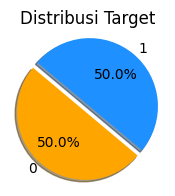

In [280]:
target = hair_balanced['Rambut_Rontok']

# Hitung jumlah tiap kelas
counts = target.value_counts()
labels = counts.index
values = counts.values

# Tampilkan angka
print(f"Negatif (0): {counts[0]}")
print(f"Positif (1): {counts[1]}")

# Pie chart
colors = ['orange', 'dodgerblue']
explode = (0.05, 0.05)

plt.figure(figsize=(2,2))
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,
        colors=colors, explode=explode)
plt.title("Distribusi Target")
plt.axis('equal')
plt.show()

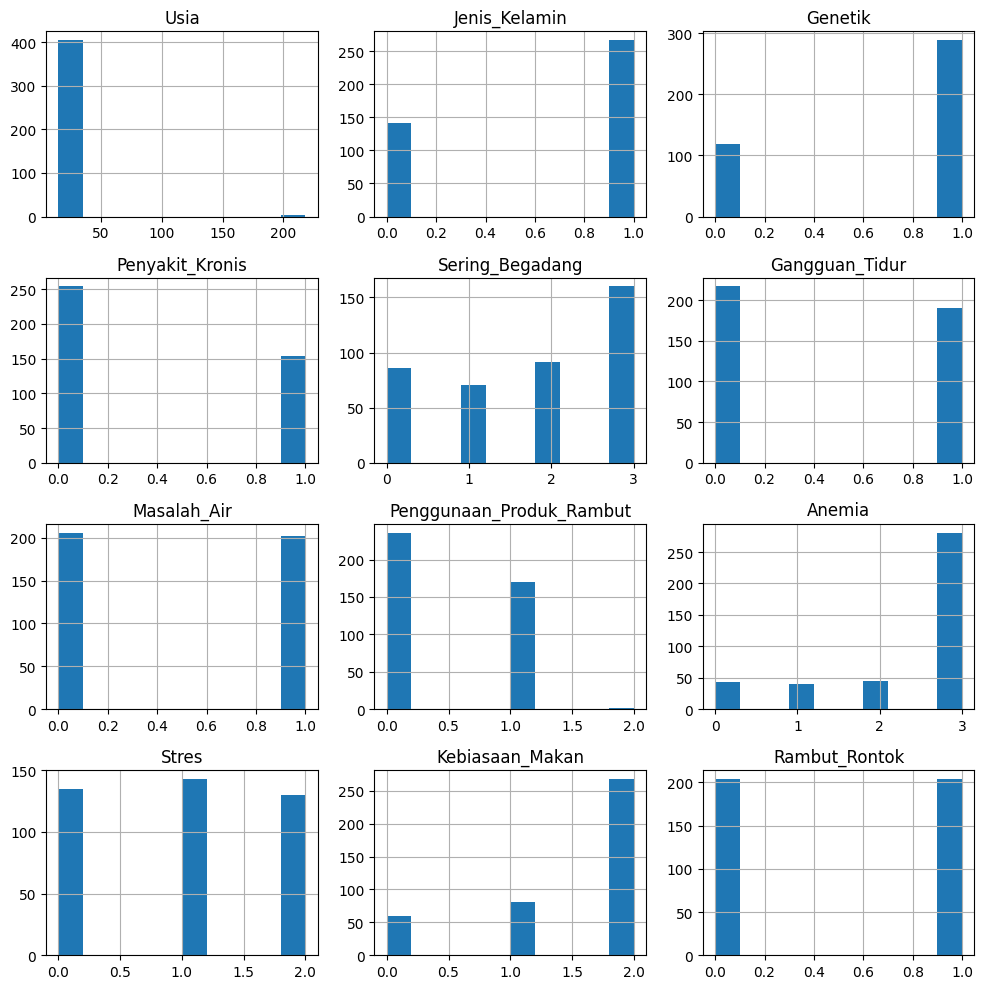

In [281]:
hair_balanced.hist(bins=10, figsize=(10, 10))
plt.tight_layout()
plt.show()

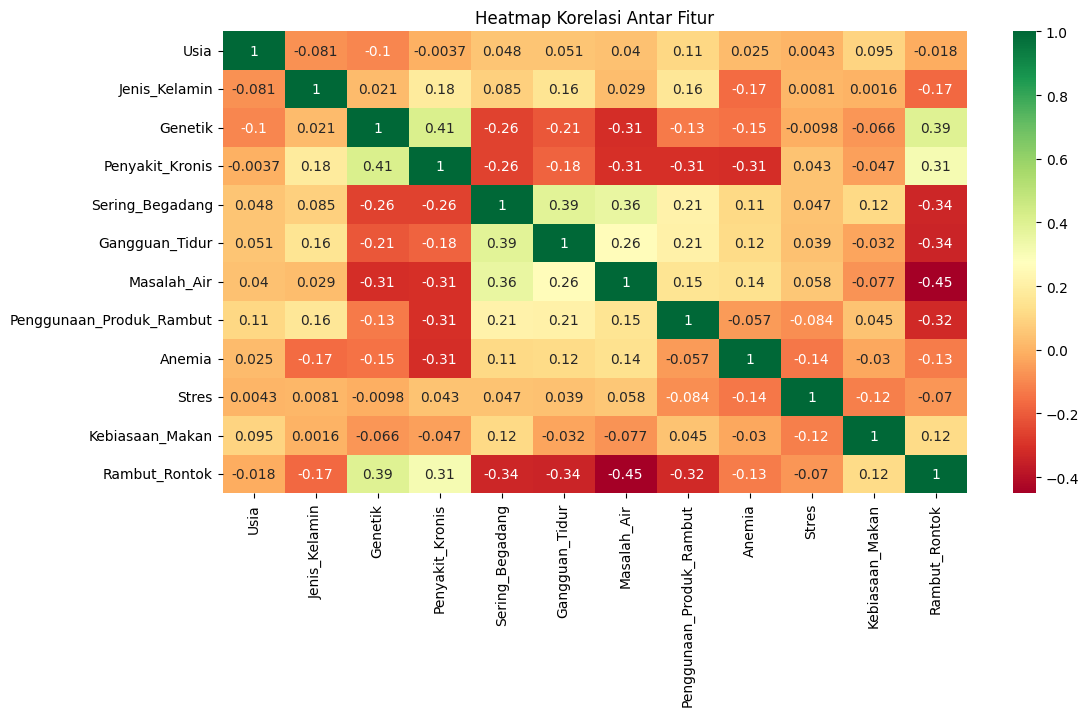

In [282]:
# Hitung korelasi antar fitur
corrmat = hair_balanced.corr()

# Ambil semua nama kolom (fitur)
top_corr_features = corrmat.index

# Ukuran figure
plt.figure(figsize=(12, 6))

# Plot heatmap
sns.heatmap(
    hair_balanced[top_corr_features].corr(),
    annot=True,        # tampilkan nilai korelasi
    cmap="RdYlGn"      # warna: merah - kuning - hijau
)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=12)
plt.show()

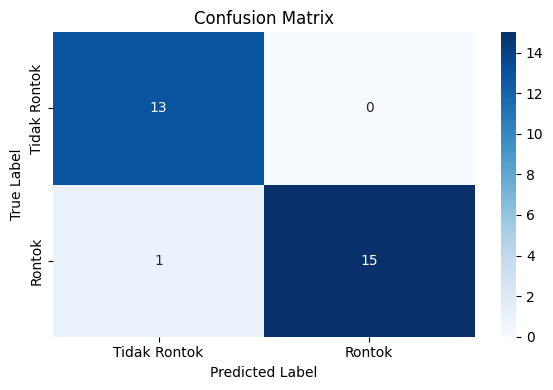

True Positive (TP): 15
True Negative (TN): 13
False Positive (FP): 0
False Negative (FN): 1


In [283]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Visualisasi heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Rontok', 'Rontok'],
            yticklabels=['Tidak Rontok', 'Rontok'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Ekstrak nilai TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Print hasil
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

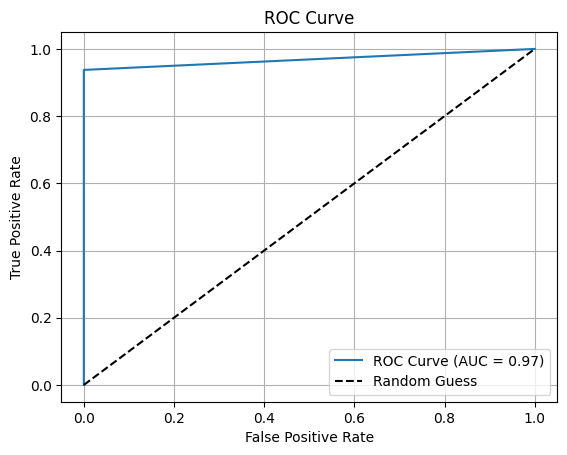

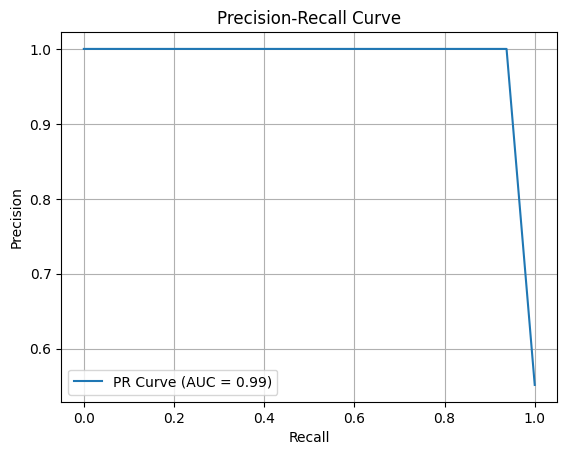

In [284]:
# Buat label dan prediksi biner
y_true = [1] * (TP + FN) + [0] * (TN + FP)
y_pred = [1] * TP + [0] * FN + [1] * FP + [0] * TN

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
pr_auc = auc(recall_vals, precision_vals)

plt.figure()
plt.plot(recall_vals, precision_vals, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Notes

<small>

**Jenis_Kelamin**  
- Male = 1  
- Female = 0  

**Genetik**  
- Yes = 1  
- No = 0  

**Penyakit_Kronis**  
- Yes (Alopecia Areata,Gangguan Tyroid, Lupus, Diabetes, Sindrom Ovarium Polikistik) = 1
- No = 0

**Sering_Begadang**
- jam_tidur 5 <= jam_tidur < 7 (Kadang-kadang Begadang) = 0
- jam_tidur kurang dari 2 jam dan seterusnya (Sangat Sering Begadang) = 1
- jam_tidur 3 <= jam_tidur < 5 (Sering Begadang) = 2
- jam_tidur >= 7 (Tidak Begadang) = 3

**Gangguan_Tidur**
- Tidak Ada Gangguan Tidur = 1
- Insomnia = 0

**Masalah_Air**
- Air Bersih = 1
- Air Berkapur = 0

**Penggunaan_Produk_Rambut**
- Tidak Pakai Produk = 1
- Mengandung Sulfat = 0

**Anemia**

- Anemia berat (6.5-7.9 g/dL) = 0
- Anemia Ringan (10 g/dL- batas normal terendah) = 1
- Anemia sedang (8-10 g/dL) = 2
- Tidak ada anemia = 3

**Stres**
- High = 0
- Low = 1
- Moderate = 2

**Kebiasaan_Makan**
- Ketergantungan Makanan Cepat Saji = 0
- Bernutrisi = 1
- Keduanya = 2


</small>


# 6. DEPLOYMENT

In [285]:
hair_balanced.head()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
0,16,1,1,0,3,1,1,0,3,1,1,0
1,26,0,1,0,0,0,1,0,3,2,0,1
2,19,0,1,0,2,1,0,0,3,2,2,1
3,24,1,1,1,0,0,1,0,2,2,0,0
4,30,1,1,1,2,1,1,0,2,2,2,0


In [286]:
hair_balanced.tail()

,Usia,Jenis_Kelamin,Genetik,Penyakit_Kronis,Sering_Begadang,Gangguan_Tidur,Masalah_Air,Penggunaan_Produk_Rambut,Anemia,Stres,Kebiasaan_Makan,Rambut_Rontok
403,30,0,1,0,3,1,1,1,3,1,1,0
404,15,0,0,0,0,0,1,0,3,2,1,0
405,25,0,1,0,1,0,0,1,2,0,2,1
406,22,1,1,0,2,1,0,1,0,0,2,1
407,15,1,1,1,1,1,0,1,2,1,1,0


In [287]:
import numpy as np

# Contoh data input manual dari user
# Pastikan urutannya sama persis dengan urutan fitur saat training
input_data = (19,0,1,0,2,1,0,0,3,2,2)

# Ubah ke bentuk array dan reshape ke [1, jumlah_fitur]
input_array = np.array(input_data).reshape(1, -1)

# Transformasi (standarisasi) input
input_scaled = scaler.transform(input_array)

# Prediksi menggunakan model XGBoost yang sudah dilatih
prediction = classifier.predict(input_scaled)

# Interpretasi hasil prediksi
if prediction[0] == 1:
    print("[1] Pasien Positif Rambut Rontok")
else:
    print("[0] Pasien Negatif Rambut Rontok")

[1] Pasien Positif Rambut Rontok


In [288]:
# Simpan model dan scaler secara terpisah
import pickle
with open('model_kerontokan.pkl', 'wb') as f_model:
    pickle.dump(classifier, f_model)

with open('scaler.pkl', 'wb') as f_scaler:
    pickle.dump(scaler, f_scaler)

print("Model dan scaler berhasil disimpan.")

Model dan scaler berhasil disimpan.
